In [222]:

import numpy as np
import sys
import pandas as pd
from numpy import genfromtxt
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.optimizers import SGD,Adam,RMSprop
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [232]:
dim = 48*48
def loadData():
    raw = pd.read_csv('train.csv', sep=',', delimiter=None, header=0)
    traw = pd.read_csv('test.csv', sep=',', delimiter=None, header=0)
    rawPA = np.array(raw)
    trawPA = np.array(traw)
    rows = rawPA.shape[0]
    trows = trawPA.shape[0]
    features = np.empty([rows, dim])
    tfeatures = np.empty([trows, dim])
    labels = np.array([])
    ids = np.array([])
    
    for i in range(rows):
        row = rawPA[i, :]
        labels = np.append(labels, row[0])
        feat = row[1].split()
        feat = list(map(int, feat))
        features[i, :] = feat
    features.astype('float32')
    features = features/255
    labels = np_utils.to_categorical(labels, 7)
    for i in range(trows):
        row = trawPA[i, :]
        ids = np.append(ids, row[0])
        feat = row[1].split()
        feat = list(map(int, feat))
        tfeatures[i, :] = feat
    tfeatures.astype('float32')
    tfeatures = tfeatures/255
    return [labels, features, ids, tfeatures]
[y_train, x_train, id_test, x_test] = loadData()
y_early = y_train[20000:,:]
x_early = x_train[20000:,:]
y_train = y_train[:20000,:]
x_train = x_train[:20000,:]
x_early = x_early.reshape(x_early.shape[0],48,48,1)
x_train = x_train.reshape(x_train.shape[0],48,48,1)

In [136]:



model = Sequential()

model.add(Conv2D(50,(3,3), input_shape=(48,48,1)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(100,(3,3)))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(200,(3,3)))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(300,(3,3)))
model.add(MaxPooling2D((2,2)))



model.add(Flatten())

model.add(Dense(units=300,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=7,activation='softmax'))

x_train = x_train.reshape(x_train.shape[0],48,48,1)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
#model.fit(x_train,y_train,batch_size=100,epochs=1)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 46, 46, 50)        500       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 23, 23, 50)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 21, 21, 100)       45100     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 10, 10, 100)       0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 8, 8, 200)         180200    
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 4, 4, 200)         0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 4, 4, 200)         0         
__________

In [166]:
ite = 0
#ac_train = np.array([])
#ac_test = np.array([])
x_train_lr = x_train_lr.reshape(x_train_lr.shape[0],48,48,1)
x_train = x_train.reshape(x_train.shape[0],48,48,1)
x_early = x_early.reshape(x_early.shape[0],48,48,1)
for e in range(1):
    model.fit(x_train_lr,y_train_lr,batch_size=100,epochs=1)
    
    
    score=model.evaluate(x_early,y_early)
    print(score[1])
    ac_test = np.append(ac_test,score[1])
    
    
    score=model.evaluate(x_train,y_train)
    print(score[1])
    ac_train = np.append(ac_train,score[1])

Epoch 1/1
19872/20000 [============================>.] - ETA: 0s0.95825


In [38]:
x_test = x_test.reshape(x_test.shape[0],48,48,1)
result=model.predict(x_test)
result = np.argmax(result,axis=1)
out = open('out.csv','w')
out.write('id,label\n')
i=0
for x in result:
    out.write("%d,%d\n" %(i,x))
    i=i+1


(48, 48, 1)


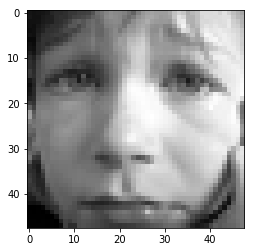

[ 0.  0.  0.  0.  1.  0.  0.]


In [225]:
a = 6
x_target = x_train_lr
y_target = y_train_lr
print(x_target[a].shape)
plt.imshow(x_target[a].reshape(48,48),cmap=plt.get_cmap('gray'))
plt.show()
print(y_target[a])


In [114]:
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=False)
# fit parameters from data
datagen.fit(x_train)
# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=x_train.shape[0]):
    x_train_lr = np.vstack((x_train, x_batch))
    y_train_lr = np.vstack((y_train, y_batch))
    #plt.imshow(x_batch[0].reshape(48,48),cmap=plt.get_cmap('gray'))
    #plt.show()
    #print(y_batch[0])
    break


In [218]:
from keras import backend as K
from scipy.misc import imsave

filter_index = 0
model.summary()
layer_name = 'dropout_16'
layer_dict = dict([(layer.name, layer) for layer in model.layers])


input_img = model.input

layer_output = layer_dict[layer_name].output
for j in range(20):
    filter_index = j
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, input_img)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    iterate = K.function([input_img], [loss, grads])

# we start from a gray image with some noise
    input_img_data = np.random.random((1, 48, 48, 1))*20 + 128.
# run gradient ascent for 20 steps
    for i in range(20):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value 
    
    img = input_img_data[0]
    plt.imshow(img.reshape(48,48),cmap=plt.get_cmap('BuGn'))
    plt.show()
#img = deprocess_image(img)
#imsave('%s_filter_%d.png' % (layer_name, filter_index), img)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 46, 46, 50)        500       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 23, 23, 50)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 21, 21, 100)       45100     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 10, 10, 100)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 8, 8, 200)         180200    
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 4, 4, 200)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 4, 4, 200)         0         
__________

InvalidArgumentError: You must feed a value for placeholder tensor 'dropout_1/keras_learning_phase' with dtype bool
	 [[Node: dropout_1/keras_learning_phase = Placeholder[dtype=DT_BOOL, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'dropout_1/keras_learning_phase', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2683, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2787, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2847, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-8557686128a6>", line 21, in <module>
    model.add(Dropout(0.5))
  File "/usr/local/lib/python3.5/dist-packages/keras/models.py", line 463, in add
    output_tensor = layer(self.outputs[0])
  File "/usr/local/lib/python3.5/dist-packages/keras/engine/topology.py", line 578, in __call__
    output = self.call(inputs, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/keras/layers/core.py", line 111, in call
    training=training)
  File "/usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py", line 2433, in in_train_phase
    training = learning_phase()
  File "/usr/local/lib/python3.5/dist-packages/keras/backend/tensorflow_backend.py", line 103, in learning_phase
    name='keras_learning_phase')
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 1502, in placeholder
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 2149, in _placeholder
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'dropout_1/keras_learning_phase' with dtype bool
	 [[Node: dropout_1/keras_learning_phase = Placeholder[dtype=DT_BOOL, shape=[], _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


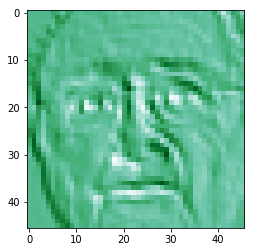

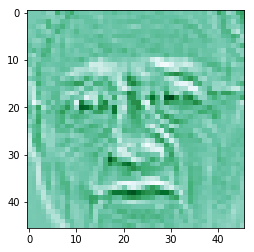

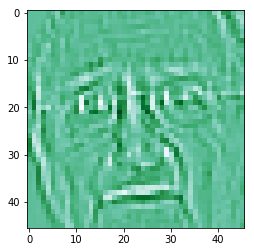

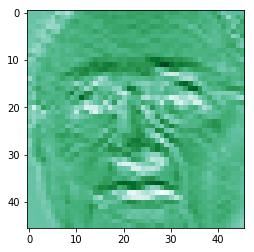

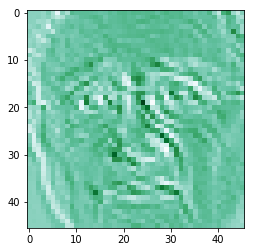

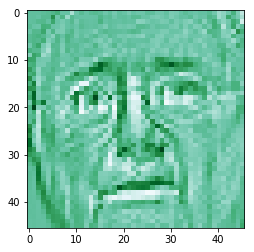

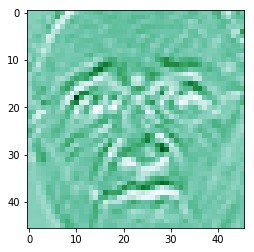

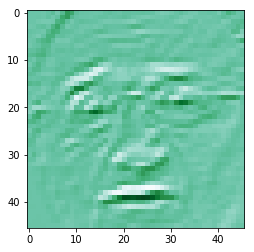

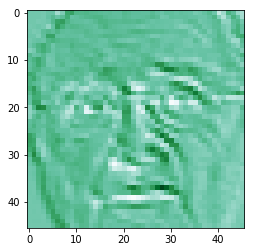

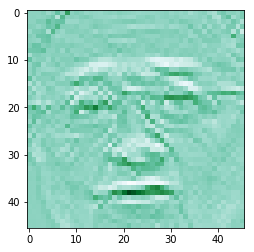

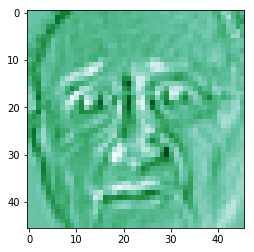

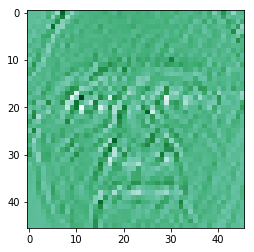

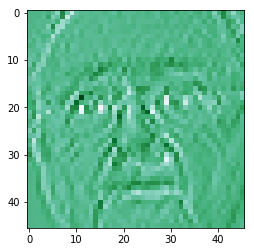

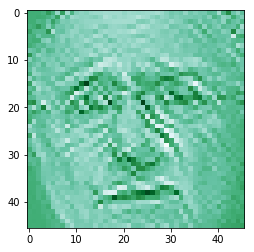

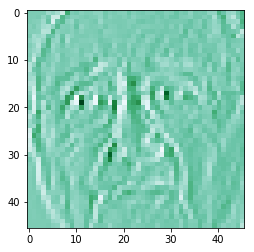

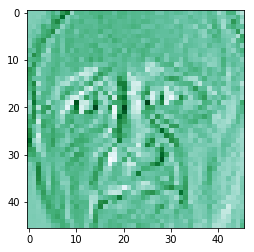

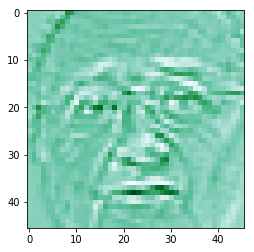

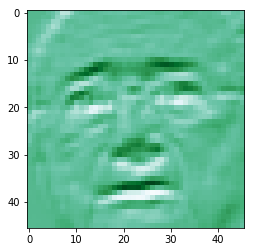

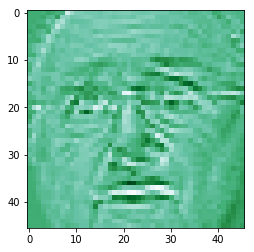

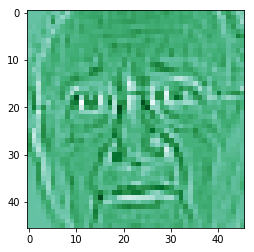

In [208]:
import os

name_ls = ['conv2d_44']

collect_layers = [ K.function([input_img, K.learning_phase()], [layer_dict[name].output]) for name in name_ls ]

picture_index = 5

for cnt, fn in enumerate(collect_layers):
    im = fn([x_train_lr[picture_index].reshape(1,48,48,1), 0]) #get the output of that layer
    nb_filter = 20
    for i in range(nb_filter):
        #ax = fig.add_subplot(nb_filter/10, 10, i+1)
        plt.imshow(im[0][0, :, :, i], cmap='BuGn')
        plt.show()
    


(48, 48, 1)


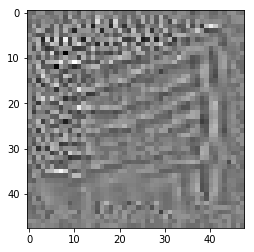

In [76]:
from scipy.misc import imsave

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
print(img.shape)
plt.imshow(img.reshape(48,48),cmap=plt.get_cmap('gray'))
plt.show()
#img = deprocess_image(img)
#imsave('%s_filter_%d.png' % (layer_name, filter_index), img)

In [ ]:
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from marcos import exp_dir

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    """
    This function prints and plots the confusion matrix.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[ 0.30535  0.35655  0.34955  0.35155  0.38865  0.36495  0.39275  0.4056
  0.42205  0.421    0.44755  0.42455  0.45885  0.4699   0.46725  0.5001
  0.49845  0.52195  0.531    0.55915  0.58155  0.59545  0.60325  0.6024
  0.6222   0.65135  0.6372   0.68555  0.6812   0.6957   0.71805  0.7338
  0.7363   0.7394   0.75625  0.7324   0.778    0.7368   0.785    0.79015
  0.77335  0.825    0.7913   0.8189   0.80785  0.8499   0.834    0.83545
  0.87525  0.86445  0.86     0.86275  0.8173   0.885    0.8628   0.8553
  0.8901   0.86875  0.88855  0.8924 ]
[ 0.30623493  0.36226892  0.35296819  0.35595361  0.38213343  0.35365714
  0.38695602  0.39407509  0.39338615  0.40257205  0.4095763   0.39200827
  0.4095763   0.41164313  0.39786428  0.41543231  0.4047537   0.41290619
  0.41026524  0.42266621  0.41416925  0.41462855  0.40969112  0.40934665
  0.40773912  0.41060971  0.39281203  0.41256172  0.40050522  0.41060971
  0.41531749  0.41554714  0.40406476  0.4100356   0.405213    0.39637157
  0.40773912  0.40

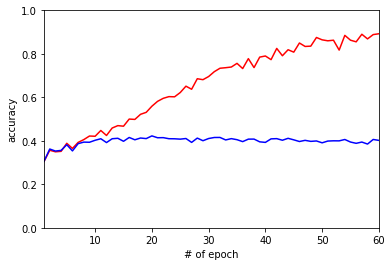

In [159]:
print(ac_train)
print(ac_test)
plt.ylabel('accuracy')
plt.xlabel('# of epoch')
plt.plot(range(1,61), ac_train, 'r')
plt.plot(range(1,61), ac_test, 'b')
plt.axis([1, 60, 0, 1])
plt.show()

In [127]:
from keras.models import load_model
model.save('model.h5')


In [154]:
model = Sequential()

model.add(Dense(input_dim=48*48,units=300,activation='relu'))

model.add(Dense(units=300,activation='relu'))

model.add(Dense(units=200,activation='relu'))

model.add(Dense(units=100,activation='relu'))

model.add(Dense(units=7,activation='softmax'))

x_train = x_train.reshape(x_train.shape[0],48*48)

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 300)               691500    
_________________________________________________________________
dense_95 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_96 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_97 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_98 (Dense)             (None, 7)                 707       
Total params: 862,807
Trainable params: 862,807
Non-trainable params: 0
_________________________________________________________________


8704/8709 [============================>.] - ETA: 0s

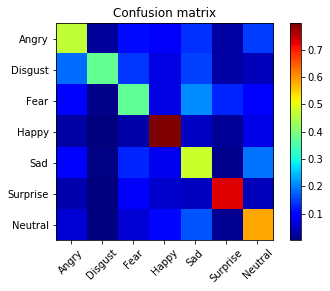

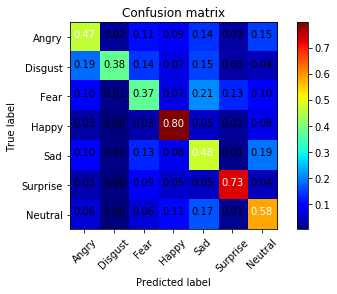

In [164]:
from sklearn.metrics import confusion_matrix
import itertools
x_early = x_early.reshape(x_early.shape[0],48,48,1)
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    """
    This function prints and plots the confusion matrix.
    """
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
model = load_model('model.h5')


predictions = model.predict_classes(x_early)
label = np.argmax(y_early,axis = 1)
conf_mat = confusion_matrix(label,predictions)

plt.figure()
plot_confusion_matrix(conf_mat, classes=["Angry","Disgust","Fear","Happy","Sad","Surprise","Neutral"])
plt.show()

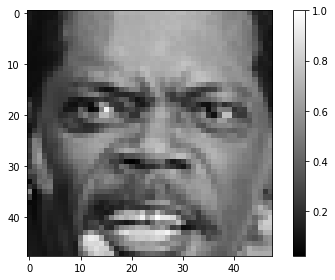

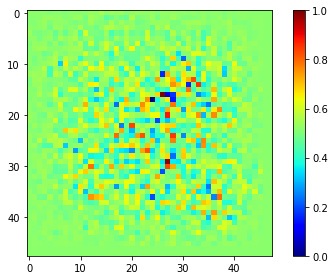

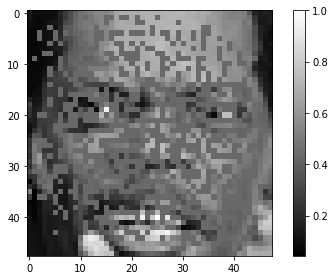

In [231]:
from matplotlib import pyplot
import matplotlib as mpl

input_img = model.input
a = 10
val_proba = model.predict(x_train_lr[a].reshape(1, 48, 48, 1))
pred = val_proba.argmax(axis=-1)


target = K.mean(model.output[:, pred])
grads = K.gradients(target, input_img)[0]

fn = K.function([input_img, K.learning_phase()], [grads])

img_grad = fn([x_train_lr[a].reshape(1, 48, 48, 1), 0])


maxVal = np.amax(img_grad[0])
minVal = np.amin(img_grad[0])

heatmap = (img_grad[0]-minVal)/(maxVal-minVal)

pyplot.figure()
pyplot.imshow(x_train_lr[a].reshape(48, 48), cmap='gray')
pyplot.colorbar()
pyplot.tight_layout()
pyplot.draw()
pyplot.show()

thres = 0.5
maskedImg = x_train_lr[a].reshape(48, 48)
maskedImg[np.where(heatmap.reshape(48, 48) <= thres)] = np.mean(maskedImg)



pyplot.figure()
pyplot.imshow(heatmap.reshape(48, 48), cmap=pyplot.cm.jet)
pyplot.colorbar()
pyplot.tight_layout()
pyplot.draw()

pyplot.figure()
pyplot.imshow(maskedImg, cmap='gray')
pyplot.colorbar()
pyplot.tight_layout()
pyplot.draw()
pyplot.show()